<h1 align=center>Assignment 2</h1>

<h2 align=center>Hierachical Clustering</h2>
    
---

**Group**: 9 (Gagandeep Singh | Simranpreet Singh | Suraj)
### Data:
Obtained from Credit Card Dataset for Clustering | Kaggle, original source unknown.

### Problem Statement:
The marketing department for a credit card company wants to learn more about the different kinds of customers they have in order to develop a marketing strategy that targets each group separately. As a data scientist, your job is to find the best way to divide the customers into groups, and to develop a description of each group to be used by the marketing strategists.

In [28]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram

<h2 align=center>Data</h2>

---

In [2]:
# loading dataset to Pandas DataFrame
df = pd.read_csv("CC GENERAL.csv")

df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [3]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

# TODO: explian columns and make observations. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
df[df.isna().any(axis=1)]

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
3     C10004  1666.670542           0.636364    1499.00           1499.00   
45    C10047  2242.311686           1.000000     437.00             97.00   
47    C10049  3910.111237           1.000000       0.00              0.00   
54    C10056     6.660517           0.636364     310.00              0.00   
55    C10057  1311.995984           1.000000    1283.90           1283.90   
...      ...          ...                ...        ...               ...   
8919  C19160    14.524779           0.333333     152.00            152.00   
8929  C19170   371.527312           0.333333       0.00              0.00   
8935  C19176   183.817004           1.000000     465.90              0.00   
8944  C19185   193.571722           0.833333    1012.73           1012.73   
8946  C19187    19.183215           1.000000     300.00              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
3                        0.0    205.788017             0.083333   
45                     340.0    184.648692             0.333333   
47                       0.0   1980.873201             0.000000   
54                     310.0      0.000000             0.666667   
55                       0.0      0.000000             0.250000   
...                      ...           ...                  ...   
8919                     0.0      0.000000             0.333333   
8929                     0.0   1465.407927             0.000000   
8935                   465.9      0.000000             1.000000   
8944                     0.0      0.000000             0.333333   
8946                   300.0      0.000000             1.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
3                       0.083333                          0.000000   
45                      0.083333                          0.333333   
47                      0.000000                          0.000000   
54                      0.000000                          0.666667   
55                      0.250000                          0.000000   
...                          ...                               ...   
8919                    0.333333                          0.000000   
8929                    0.000000                          0.000000   
8935                    0.000000                          0.833333   
8944                    0.333333                          0.000000   
8946                    0.000000                          0.833333   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
3                   0.083333                 1              1        7500.0   
45                  0.166667                 2              5        2400.0   
47                  0.500000                 7              0        4200.0   
54                  0.000000                 0              8        1000.0   
55                  0.000000                 0              6        6000.0   
...                      ...               ...            ...           ...   
8919                0.000000                 0              2        1500.0   
8929                0.166667                 5              0        1500.0   
8935                0.000000                 0              6        1500.0   
8944                0.000000                 0              2        4000.0   
8946                0.000000                 0              6        1000.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
3       0.000000               NaN               0.0      12  
45      0.000000               NaN               0.0      12  
47      0.000000               NaN               0.0      12  
54    417.016763               NaN               0.0      12  
55      0.000000               NaN               0.0      12  
...          ...               ...               ...     ...  
8919    0.000000               NaN          

In [7]:
df = df.dropna()

In [8]:
df = df.drop(['CUST_ID'],axis=1)

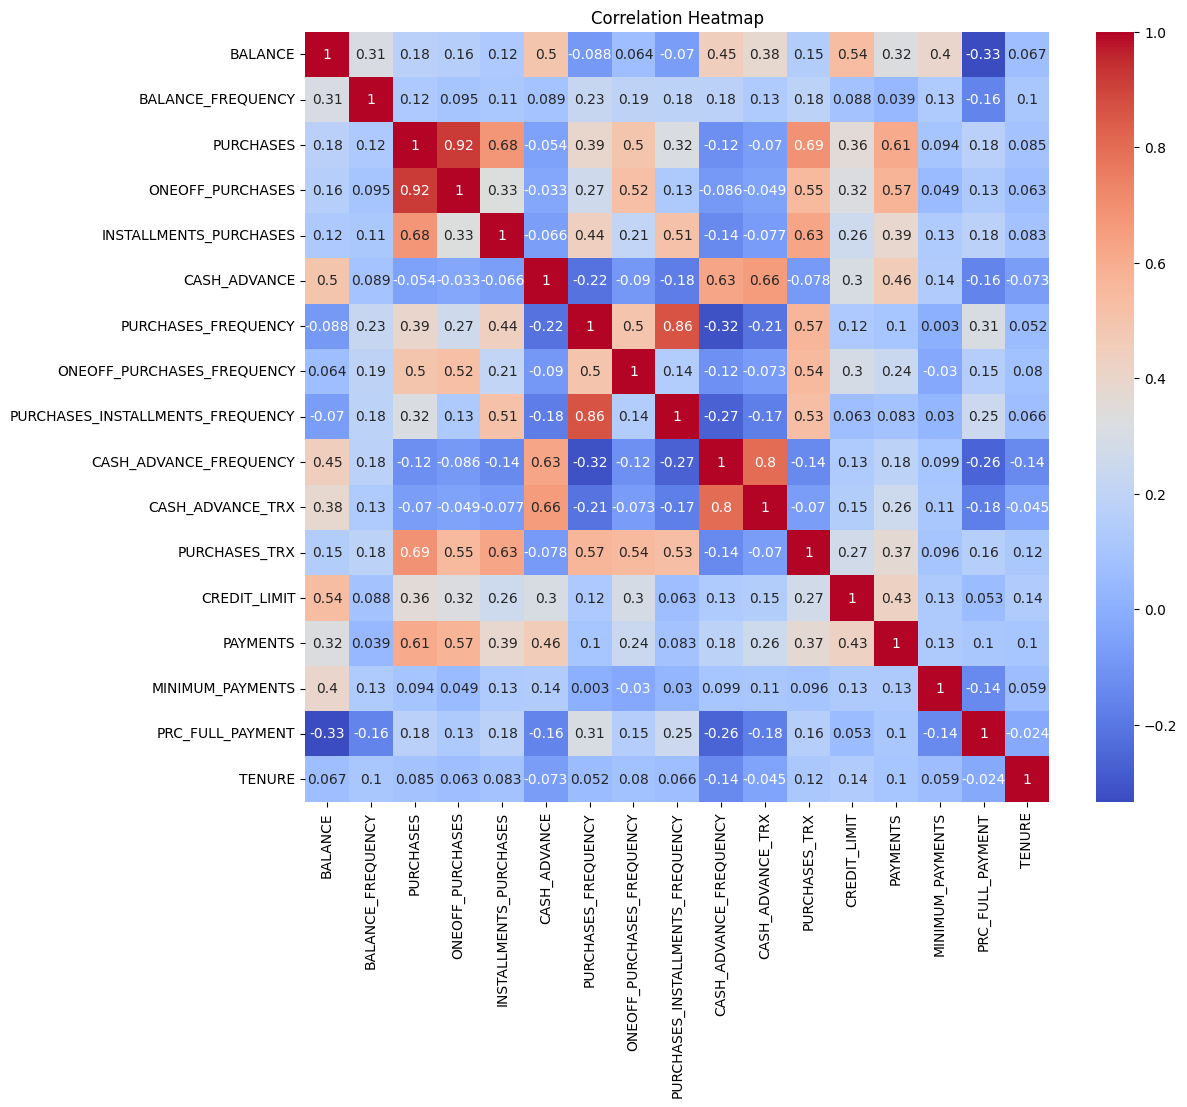

In [9]:
# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


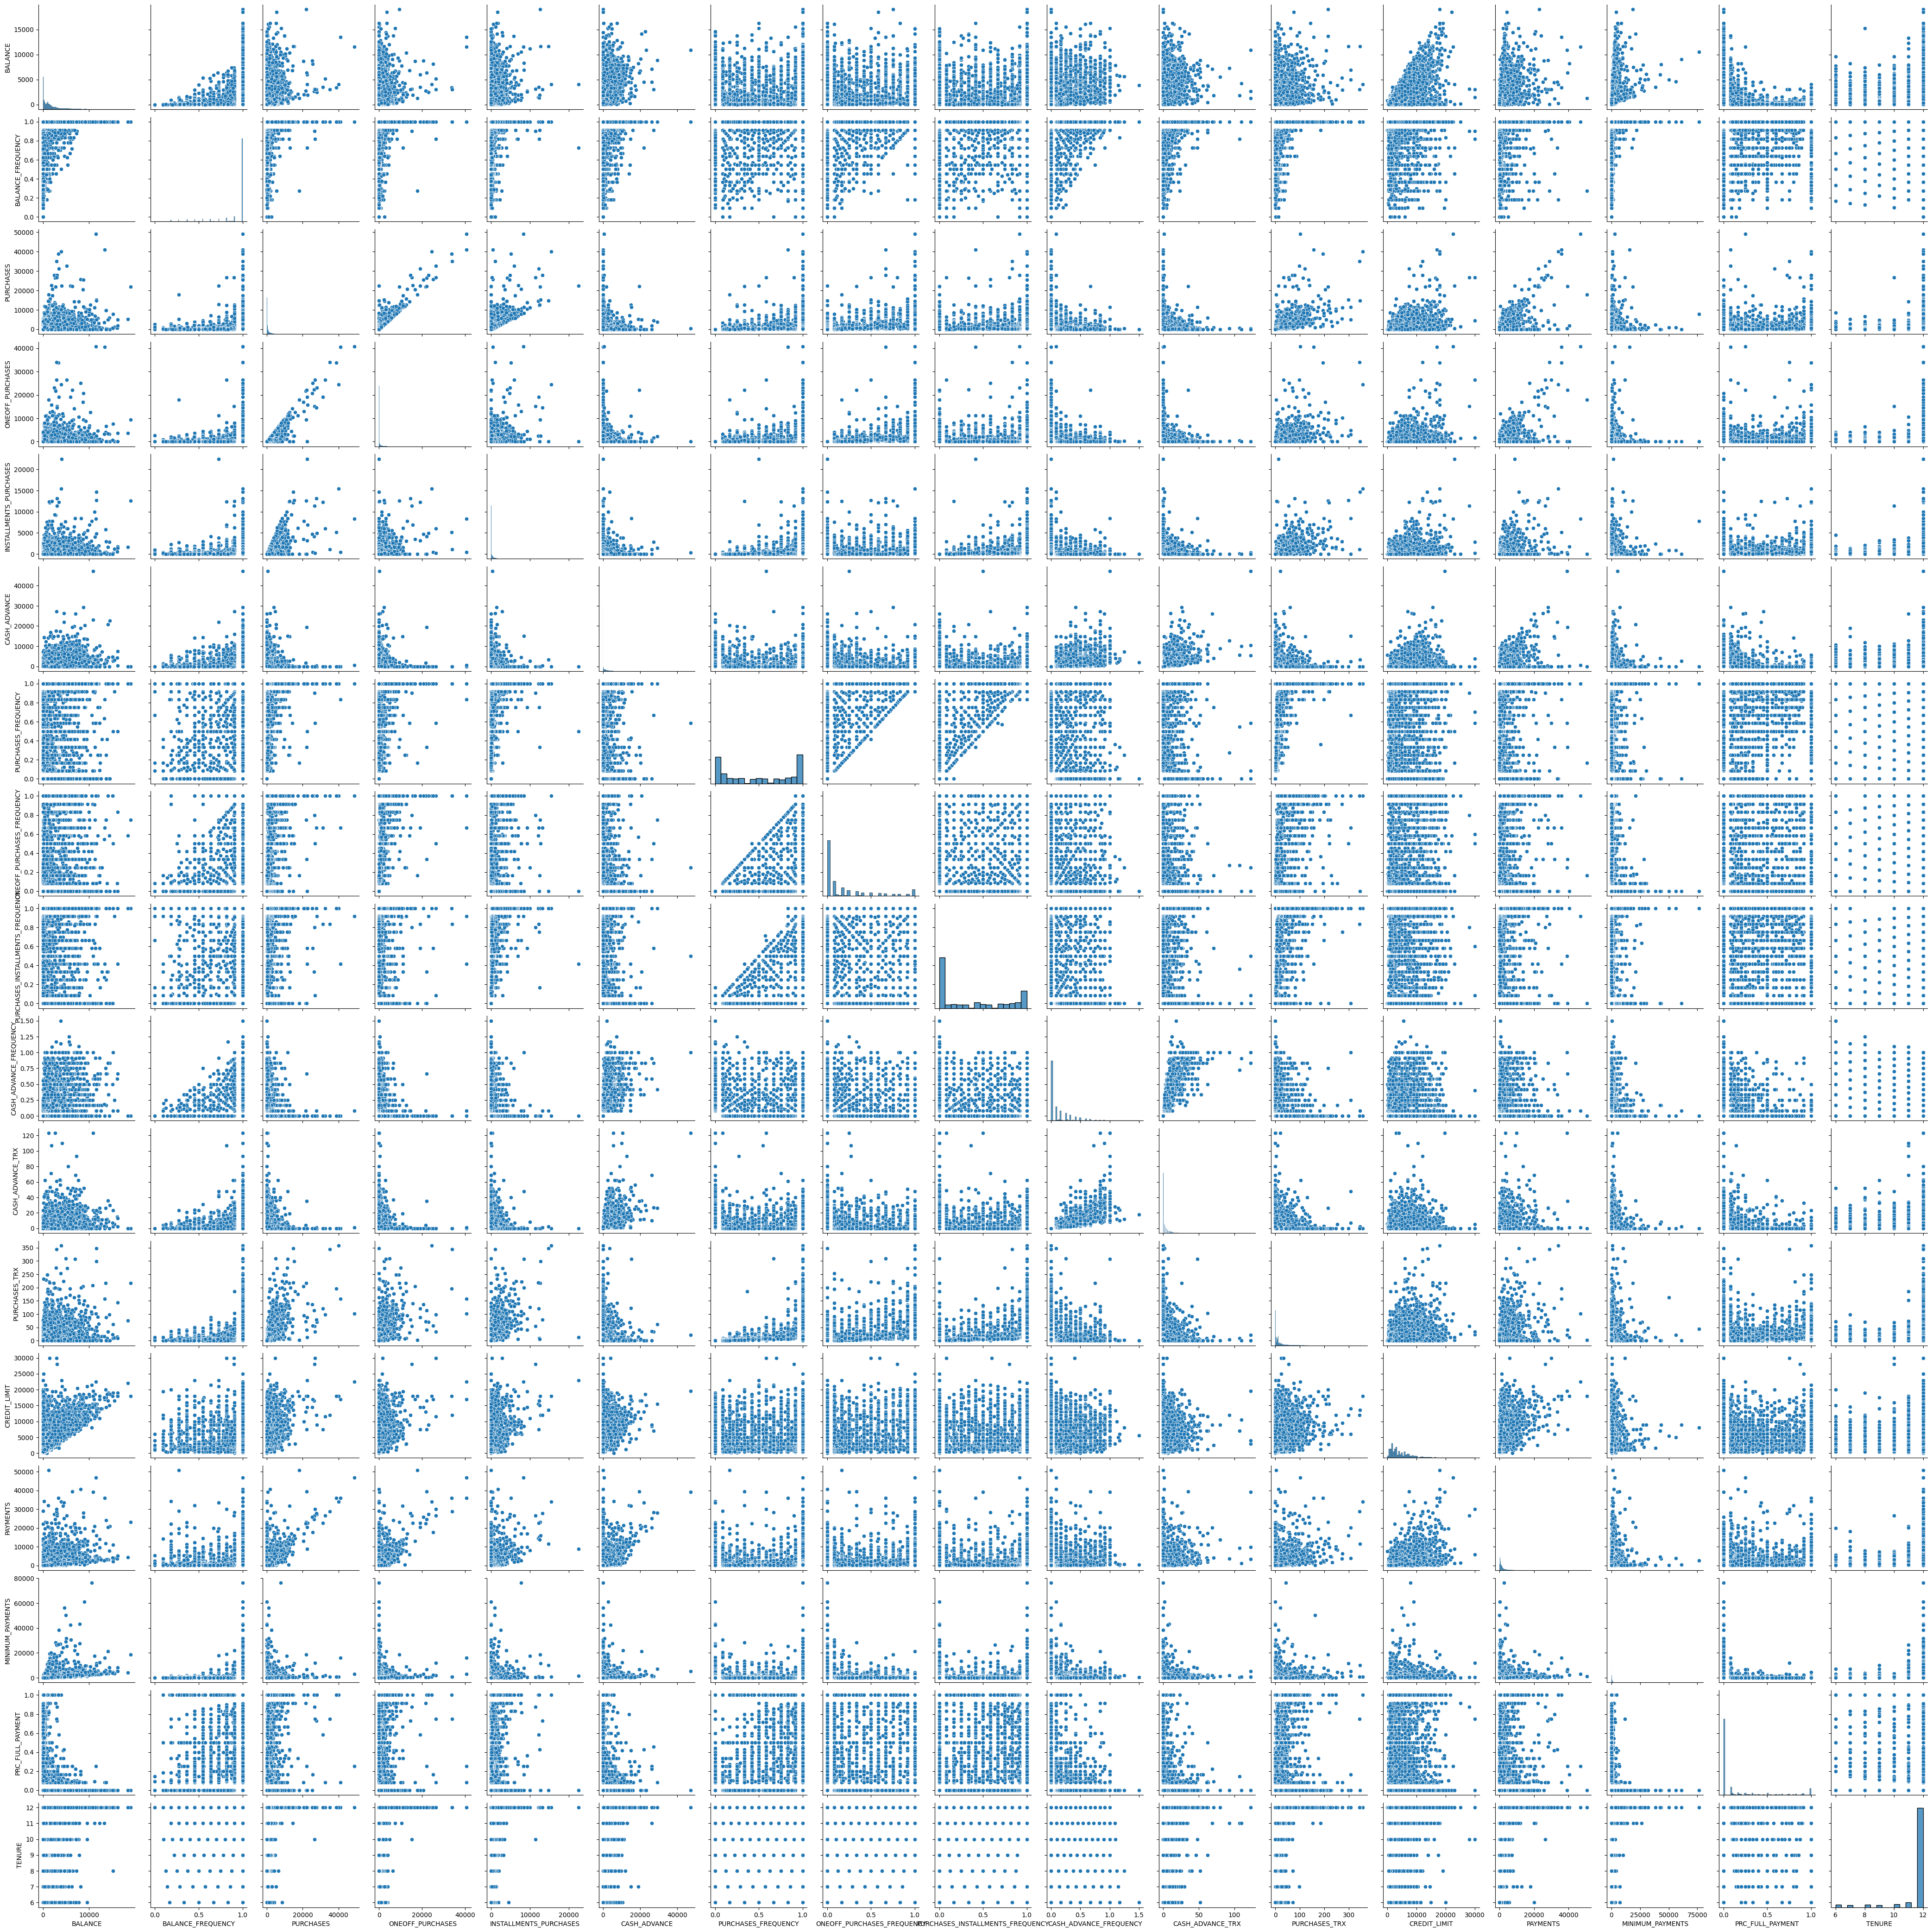

In [23]:
sns.pairplot(df)
plt.show()

# TODO: make observations on plots

<h2 align=center>Modeling</h2>

---

In [11]:
# Creating StandardScaler() object
scaler = StandardScaler()

# Fit the scaler to the data. 
scaler.fit(df)

# Transform the data and store in new DataFrame
df_scaled = pd.DataFrame(scaler.transform(df), columns=df.columns)
df_scaled.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.744625          -0.370047  -0.429184         -0.359160   
1  0.764152           0.067679  -0.473208         -0.359160   
2  0.426602           0.505405  -0.116413          0.099909   
3 -0.373910           0.505405  -0.465825         -0.349660   
4  0.099551           0.505405   0.142062         -0.359160   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.354826     -0.468655            -0.820769   
1               -0.458839      2.568556            -1.236139   
2               -0.458839     -0.468655             1.256077   
3               -0.458839     -0.468655            -1.028455   
4                0.994815     -0.468655             0.425339   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.686280                         -0.717179   
1                   -0.686280                         -0.926522   
2                    2.646651                         -0.926522   
3                   -0.408536                         -0.926522   
4                   -0.686280                          0.538882   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.681953         -0.479437      -0.517623     -0.962575   
1                0.557022          0.099258      -0.597054      0.677204   
2               -0.681953         -0.479437      -0.120467      0.813852   
3               -0.681953         -0.479437      -0.557339     -0.907916   
4               -0.681953         -0.479437      -0.279329     -0.743938   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0 -0.543942         -0.305508         -0.537727  0.355181  
1  0.796852          0.087689          0.212380  0.355181  
2 -0.399503         -0.099906         -0.537727  0.355181  
3 -0.380165         -0.261131         -0.537727  0.355181  
4 -0.132119          0.650363         -0.537727  0.355181

In [12]:
# Define the parameter grid
param_grid = {
    'n_clusters': [2,3,4,5,6],
    'metric': [ 'euclidean', 'l1', 'l2'],
    'linkage': [ 'ward','complete', 'average', 'single']
}


best_score = -1
best_params = None

# Initialize a dictionary to store silhouette scores for each parameter combination
silhouette_scores = []


for params in ParameterGrid(param_grid):
    # Create the Agglomerative Clustering model
    model = AgglomerativeClustering(n_clusters=params['n_clusters'], linkage=params['linkage']).fit(df_scaled)
    
    # Calculate silhouette score (or other metrics)
    score = silhouette_score(df_scaled, model.labels_)
    
    # Append the score and the corresponding parameters
    silhouette_scores.append((params, score))
    
       # Compare and store best model
    if score > best_score:
        best_score = score
        best_params = params

# Output the best parameters and score
print("Best parameters:", best_params)
print("Best silhouette score:", best_score)

Best parameters: {'linkage': 'average', 'metric': 'euclidean', 'n_clusters': 2}
Best silhouette score: 0.8389125052466642


In [13]:
len(silhouette_scores)

60

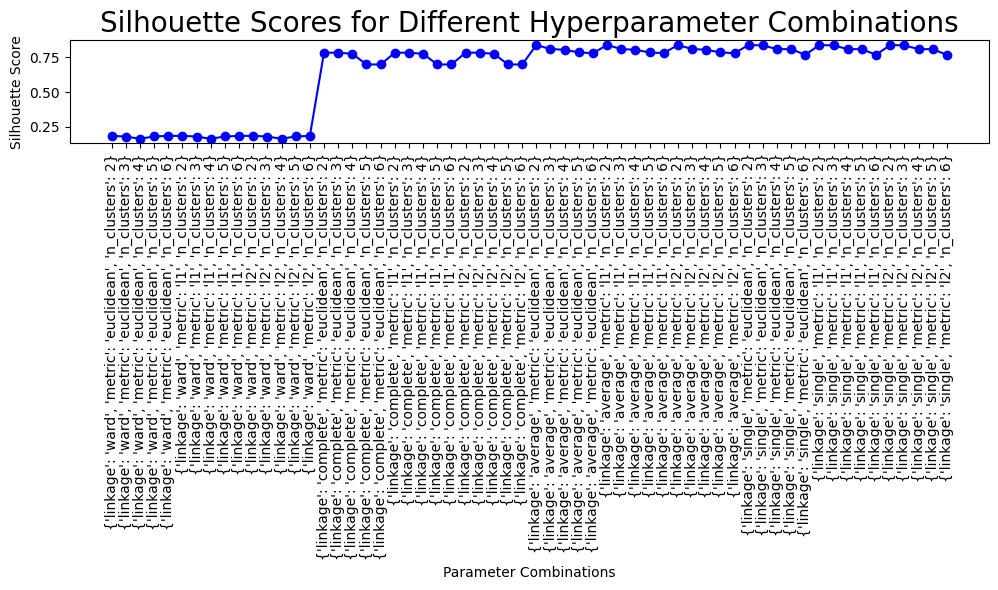

In [14]:
# Extract scores and params for plotting
scores = [score for _, score in silhouette_scores]
params = [str(param) for param, _ in silhouette_scores]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(len(scores)), scores, marker='o', linestyle='-', color='b')
plt.xticks(range(len(params)), params, rotation=90)  # Set the x-tick labels to the parameter combinations
plt.xlabel('Parameter Combinations')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Hyperparameter Combinations', size=20)
plt.tight_layout()
plt.show()

In [49]:
# Generate distance matrix with 'linkage' function
distances = linkage(df_scaled, method="ward")
print(distances)

[[4.21200000e+03 6.14700000e+03 9.27071433e-03 2.00000000e+00]
 [2.16500000e+03 7.78900000e+03 1.41017780e-02 2.00000000e+00]
 [3.79800000e+03 5.37000000e+03 1.50914115e-02 2.00000000e+00]
 ...
 [1.72640000e+04 1.72660000e+04 1.49719885e+02 3.16800000e+03]
 [1.72630000e+04 1.72670000e+04 1.63256195e+02 5.46800000e+03]
 [1.72680000e+04 1.72690000e+04 2.02857540e+02 8.63600000e+03]]


In [50]:
distances.shape

(8635, 4)

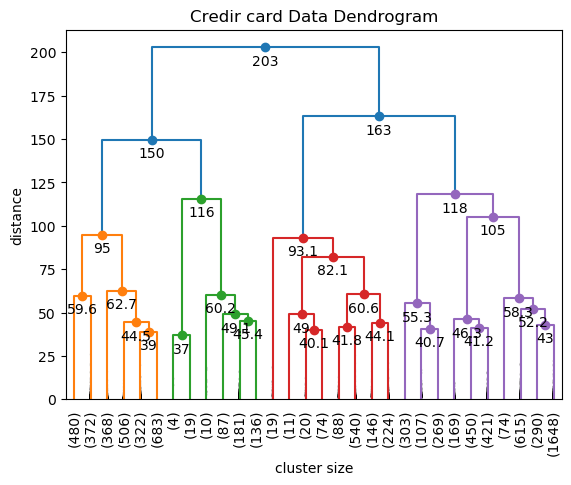

In [51]:
# Take normal dendrogram output and stylize in cleaner way

def annotated_dendrogram(*args, **kwargs):
    # Standard dendrogram from SciPy
    scipy_dendro = dendrogram(*args, truncate_mode='lastp', show_contracted=True,leaf_rotation=90.)

    plt.title('Credir card Data Dendrogram')
    plt.xlabel('cluster size')
    plt.ylabel('distance')
    
    for i, d, c in zip(scipy_dendro['icoord'], scipy_dendro['dcoord'], scipy_dendro['color_list']):
        x = 0.5 * sum(i[1:3])
        y = d[1]
        if y > 10:
            plt.plot(x, y, 'o', c=c)
            plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                         textcoords='offset points',
                         va='top', ha='center')
    return scipy_dendro

dn = annotated_dendrogram(distances)
plt.show()

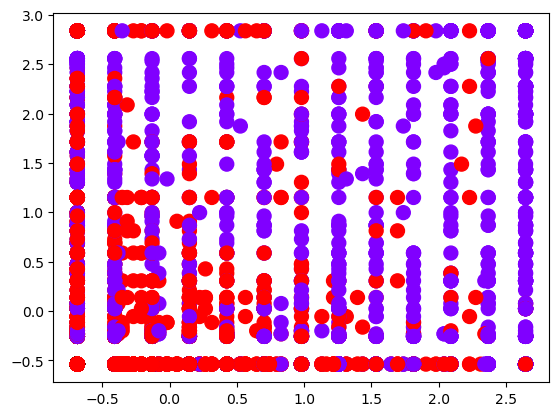

In [59]:
scipy_clusters = fcluster(distances, 175, criterion="distance")

plt.scatter(df_scaled['ONEOFF_PURCHASES_FREQUENCY'], df_scaled['PRC_FULL_PAYMENT'], c=scipy_clusters, cmap='rainbow', s=100)


In [61]:
sil_score = silhouette_score(df_scaled,scipy_clusters)
print(sil_score)

0.18418454528547495


In [66]:
# Define the parameter grid
param_grid = {
    't' : [50,60,75,125,175],
    'criterion' : ['distance'],
    'depth' : [1,2,5,10]
}


best_score = -1
best_params = None

# Initialize a dictionary to store silhouette scores for each parameter combination
silhouette_scores = []


for params in ParameterGrid(param_grid):
    # Create the Agglomerative Clustering model
    scipy_clusters = fcluster(distances, t= params['t'], criterion= params['criterion'], depth= params['depth'])
    
    # Calculate silhouette score (or other metrics)
    score = silhouette_score(df_scaled,scipy_clusters)

    
    # Append the score and the corresponding parameters
    silhouette_scores.append((params, score))
    
       # Compare and store best model
    if score > best_score:
        best_score = score
        best_params = params

# Output the best parameters and score
print("Best parameters:", best_params)
print("Best silhouette score:", best_score)

Best parameters: {'criterion': 'distance', 'depth': 1, 't': 75}
Best silhouette score: 0.1865256797594413


In [71]:
scipy_clusters = fcluster(**best_params)

TypeError: fcluster() missing 1 required positional argument: 'Z'

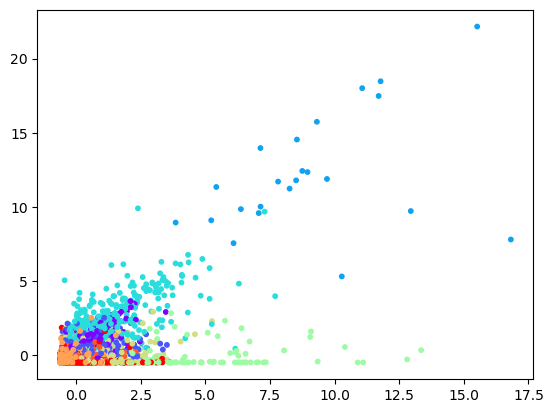

In [72]:
plt.scatter(df_scaled['PAYMENTS'], df_scaled['PURCHASES'], c=scipy_clusters, cmap='rainbow', s=10)

TypeError: 'criterion' is an invalid keyword argument for print()